In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set()
import altair as alt
from altair.vega import v5
from IPython.display import HTML
import json
import graphviz
from sklearn import tree
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

import os
import importlib.util
spec_1 = importlib.util.find_spec('helpers')
if spec_1 is None:
    dir_code = os.path.realpath('.//Users/burcakbal/Desktop/Final Project Data/')
    os.chdir(os.path.realpath(dir_code))
from helpers import *

**Data loading and overview**

Data is separated into two datasets: information about the identity of the customer and transaction information. Not all transactions belong to identities, which are available. Maybe it would be possible to use additional transactions to generate new features.



**Categorical Features - Transaction**

ProductCD
card1 - card6
addr1, addr2
P_emaildomain
R_emaildomain
M1 - M9

**Categorical Features - Identity**

DeviceType
DeviceInfo
id_12 - id_38

**1. Identity Table:**

id_01 - id_38: contains network connection information

DeviceType and DeviceInfo

**2. Transactional Table:**

card1 - card6: card information

addr: address

dist: distance

P_ and (R__) emaildomain: purchaser and recipient email domain

C1-C14: counting

D1-D15: timedelta, such as days between previous transaction, etc.

M1-M9: match, such as names on card and address, etc.

V1-V339: Vesta engineered features

ProductCD: product code, the product for each transaction

TransactionDT: timedelta from a given reference datetime

TransactionAMT: transaction payment amount in USD

In [2]:
# read csv files into pandas trains
train_identity = pd.read_csv('train_identity.csv')
train_transaction = pd.read_csv('train_transaction.csv')
test_identity = pd.read_csv('test_identity.csv')
test_transaction = pd.read_csv('test_transaction.csv')

In [3]:
len(train_transaction[train_transaction["isFraud"]==1])

20663

In [4]:
# let's combine the data and work with the whole dataset
train= train_identity.merge(train_transaction,on = 'TransactionID',how="left")
test = test_identity.merge(test_transaction, on = 'TransactionID',how="left")


In [5]:
len(train[train["isFraud"]==0])

132915

In [6]:
len(train.columns)

434

In [7]:
# % of missing values in the identity data
print('\n % of missing values in train dataset')
print(f'{round(train.isnull().sum().sum()*100/(len(train)*len(train.columns)), 2)} %')


 % of missing values in train dataset
26.89 %


In [8]:
print(f'There are {train.isnull().any().sum()} columns in train dataset with missing values.')


There are 412 columns in train dataset with missing values.


**Dropping process for some values which has more than %50 percent missing values**

In [9]:
nan_cols50 = [i for i in train.columns if train[i].isnull().sum() > 0.50*train.shape[0]]

In [10]:
nan_cols50

['id_03',
 'id_04',
 'id_07',
 'id_08',
 'id_18',
 'id_21',
 'id_22',
 'id_23',
 'id_24',
 'id_25',
 'id_26',
 'id_27',
 'dist1',
 'dist2',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D10',
 'D11',
 'D12',
 'D13',
 'D14',
 'D15',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V41',
 'V42',
 'V43',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V65',
 'V66',
 'V67',
 'V68',
 'V69',
 'V70',
 'V71',
 'V72',
 'V73',
 'V74',
 'V75',
 'V76',
 'V77',
 'V78',
 'V79',
 'V80',
 'V81',
 'V82',
 'V83',
 'V84',
 'V85',
 'V86',
 'V87',
 'V88',
 'V89',
 'V9

In [11]:
train.drop(nan_cols50,axis=1,inplace=True)

In [12]:
train

,TransactionID,id_01,id_02,id_05,id_06,id_09,id_10,id_11,id_12,id_13,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2987008,-5.0,98945.0,0.0,-5.0,NaN,NaN,100.0,NotFound,49.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,100.0,NotFound,52.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987011,-5.0,221832.0,0.0,-6.0,NaN,NaN,100.0,NotFound,52.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987016,0.0,7460.0,1.0,0.0,0.0,0.0,100.0,NotFound,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,3577521,-15.0,145955.0,0.0,0.0,0.0,0.0,100.0,NotFound,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144229,3577526,-5.0,172059.0,1.0,-5.0,NaN,NaN,100.0,NotFound,27.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
144230,3577529,-20.0,632381.0,-1.0,-36.0,NaN,NaN,100.0,NotFound,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144231,3577531,-5.0,55528.0,0.0,-7.0,0.0,0.0,100.0,NotFound,27.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Most of columns have missing data, which is normal in real world. Also there are columns with one unique value (or all missing). There are a lot of continuous variables and some categorical. Let's have a closer look at them.

**Data Exploration**

Let's start with identity information. id_01 - id_11 are continuous variables, id_12 - id_38 are categorical and the last two columns are obviously also categorical.

**1) Missing Data**

<AxesSubplot:>

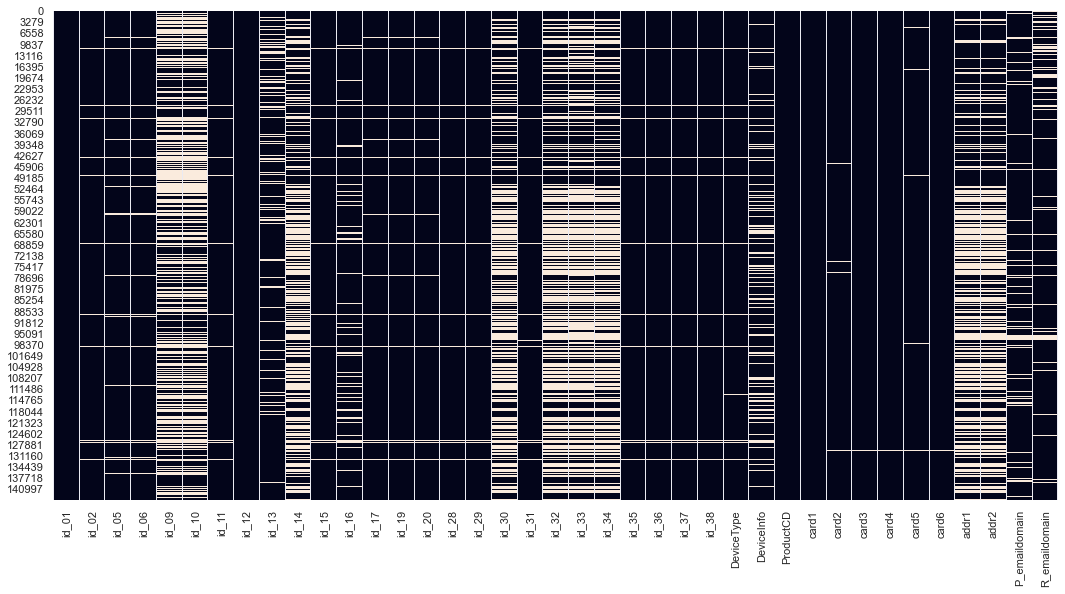

In [13]:
train_full_cat = train.filter(regex='id|card|ProductCD|addr|email|M|DeviceType|DeviceInfo')
plt.figure(figsize=(18,9))
sns.heatmap(train_full_cat.isnull(), cbar= False)

Observation: We can see that our data has a lot of missing values. White color presents missing values.

1. Most M columns missing almost if not all data

2. Id_07, 08 and id_21-27 missing most data

3. Id_01, id_12, card1, card2 contains mostly non-null. Perhaps, these columns contain unique ID information, and therefore, cannot be null. Let's double check the number of missing in these columns:

In [14]:
train_full_cat[['id_01','id_12','card1','card2']].info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144233 entries, 0 to 144232
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id_01   144233 non-null  float64
 1   id_12   144233 non-null  object 
 2   card1   144233 non-null  int64  
 3   card2   143331 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 5.5+ MB


<ipython-input-14-75218bcff421>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  train_full_cat[['id_01','id_12','card1','card2']].info(null_counts=True)


Yes, they are indeed complete, except for card 2. If I were to guess, card1 could be first name and card2 could be last name.

Now let's check out missing data for **numerical** variables:

In [15]:
# train_full_Vesta = train.filter(regex='isFraud|TransactionDT|TransactionAmt|dist|C|D')
# plt.figure(figsize=(18,9))
# sns.heatmap(train_full_Vesta.isnull(), cbar= False)

Observation:

1. Basic information about transaction such as ID, DT, amount and type of product is complete 

2. Dist1 and dist2 is very sparse.

3. C columns are complete

4. Most D columns are sparse except D1

In [16]:
# train_full_Vesta = train.filter(regex='V')
# plt.figure(figsize=(18,9))
# sns.heatmap(train_full_Vesta.isnull(), cbar= False)

In [17]:
#msno.dendrogram(train_full_Vesta)

Interpretation: The dendrogram uses a hierarchical clustering algorithm to bin variables against one another by their nullity correlation. Each cluster of leaves explain how one variable might always be empty when another is empty, or filled when another variable is filled. This dendogram suggests that the position of missing/fill values are correlated. Perhaps similar columns were derived from the same feature or combinations of features.

**2. Replacement or drop the missings**

Understand that Train and Test data were splitted by time

Text(0.5, 1.0, 'Distribution of Transaction Time')

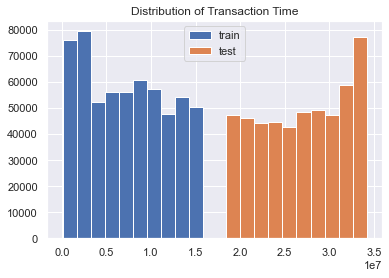

In [18]:
plt.hist(train_transaction['TransactionDT'], label='train')
plt.hist(test_transaction['TransactionDT'], label='test')
plt.legend()
plt.title('Distribution of Transaction Time')

**3. Response/ Target Variable**


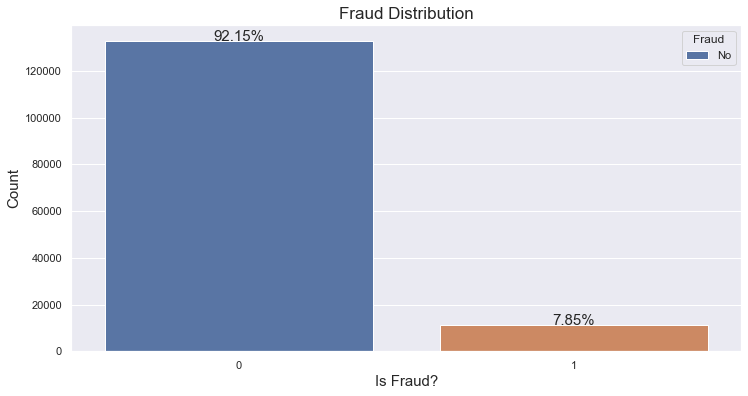

In [19]:
plt.figure(figsize=(12,6))
g = sns.countplot(x = 'isFraud', data = train)
g.set_title("Fraud Distribution", fontsize = 17)
g.set_xlabel("Is Fraud?", fontsize = 15)
g.set_ylabel("Count", fontsize = 15)
plt.legend(title='Fraud', labels=['No', 'Yes'])

for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(train) * 100),
            ha="center", fontsize=15) 

Observation:The fraud percentage is quite high: 7.85% for the complete observations (identity + transaction). We can see there is a class imbalance problem, where occurence of one class is significantly higher than another. This will lead to much a higher false negative - tendency of picking "not fraud". We can mitigate this issue by using two common methods:

Cost function based approaches

Sampling based approaches

**Explore Categorical Features**

**Categorical Features:**

**1. Transactional Table:**

In [20]:
train_full_cat.head()

,id_01,id_02,id_05,id_06,id_09,id_10,id_11,id_12,id_13,id_14,...,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,R_emaildomain
0,0.0,70787.0,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,...,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,gmail.com,NaN
1,-5.0,98945.0,0.0,-5.0,NaN,NaN,100.0,NotFound,49.0,-300.0,...,2803,100.0,150.0,visa,226.0,debit,337.0,87.0,anonymous.com,NaN
2,-5.0,191631.0,0.0,0.0,0.0,0.0,100.0,NotFound,52.0,NaN,...,16496,352.0,117.0,mastercard,134.0,credit,NaN,NaN,gmail.com,gmail.com
3,-5.0,221832.0,0.0,-6.0,NaN,NaN,100.0,NotFound,52.0,NaN,...,4461,375.0,185.0,mastercard,224.0,debit,NaN,NaN,hotmail.com,hotmail.com
4,0.0,7460.0,1.0,0.0,0.0,0.0,100.0,NotFound,NaN,-300.0,...,1790,555.0,150.0,visa,226.0,debit,170.0,87.0,aol.com,NaN


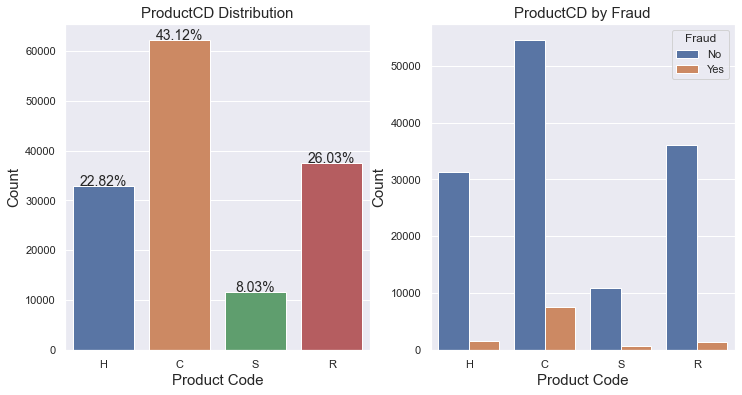

In [21]:
plt.figure(figsize=(12,6))

total = len(train_full_cat)

plt.subplot(121)
g = sns.countplot(x = 'ProductCD', data = train_full_cat)
g.set_title('ProductCD Distribution', fontsize = 15)
g.set_xlabel("Product Code", fontsize=15)
g.set_ylabel("Count", fontsize=15)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 

plt.subplot(122)
g1 = sns.countplot(x='ProductCD', hue='isFraud', data=train)
g1.set_title('ProductCD by Fraud', fontsize = 15)
g1.set_xlabel("Product Code", fontsize=15)
g1.set_ylabel("Count", fontsize=15)
plt.legend(title='Fraud', loc='best', labels=['No', 'Yes'])

Observations:

C is the most frequent product category. Product C also have the highest count of fraud. We can obtain the proportion of fraud for each product category:

In [22]:
train[train['isFraud'] == 1]['ProductCD'].value_counts(normalize = True)

C    0.675031
H    0.138805
R    0.125729
S    0.060435
Name: ProductCD, dtype: float64

In [23]:
train.groupby('ProductCD')['isFraud'].value_counts(normalize = True)


ProductCD  isFraud
C          0          0.877155
           1          0.122845
H          0          0.952261
           1          0.047739
R          0          0.962102
           1          0.037898
S          0          0.940958
           1          0.059042
Name: isFraud, dtype: float64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'C'), Text(1, 0, 'H'), Text(2, 0, 'R'), Text(3, 0, 'S')])

<Figure size 864x864 with 0 Axes>

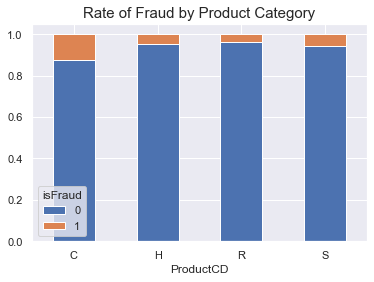

In [24]:
# visualization of table
plt.figure(figsize=(12,12))
a = train.groupby('ProductCD')['isFraud'].value_counts(normalize = True).unstack().plot.bar(stacked = True)
a.set_title('Rate of Fraud by Product Category', fontsize = 15)
plt.xticks(rotation='horizontal')

Conclusion: Product C takes up 67.5% of fraud cases for transactions that have identity. And also have highest rate of fraud: 12%, more than double any other class of product.

Question: Why product C? Is there any additional information that help us better understand product C high fraud rate?

We have 2 numerical variables that we can compare between groups of products:

TransactionDT: timedelta from a given reference datetime

TransactionAmt: transaction payment amount in USD

<AxesSubplot:xlabel='ProductCD', ylabel='TransactionAmt'>

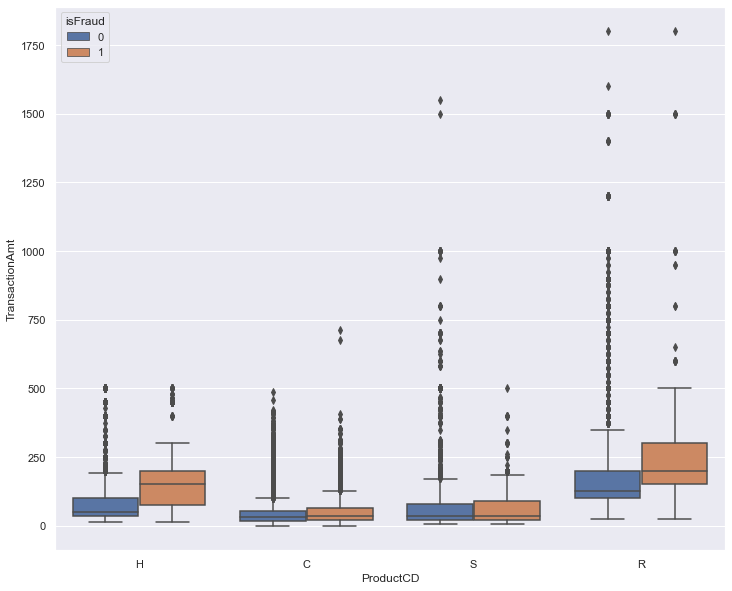

In [25]:
plt.figure(figsize=(12,10))
sns.boxplot(x = 'ProductCD', y = 'TransactionAmt', hue = 'isFraud', data = train)

Observation: Product C are items with low dollar value.



<AxesSubplot:xlabel='ProductCD', ylabel='TransactionDT'>

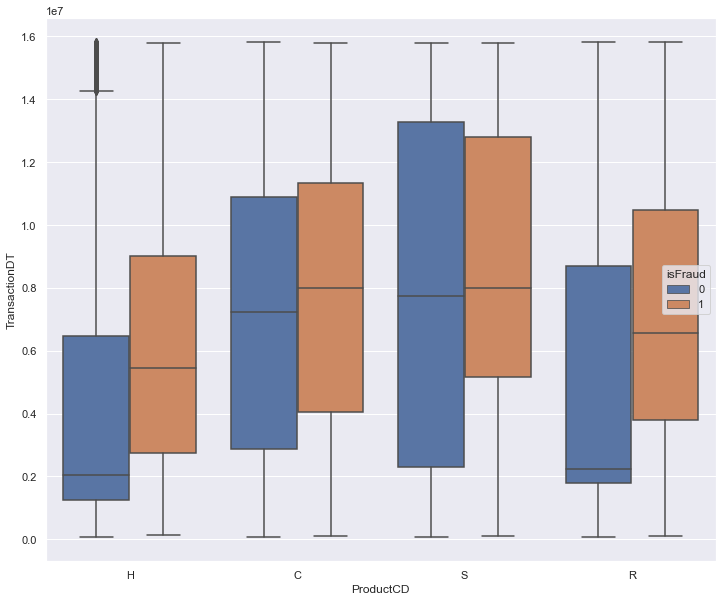

In [26]:
plt.figure(figsize=(12,10))
sns.boxplot(x = 'ProductCD', y = 'TransactionDT', hue = 'isFraud', data = train)

**Examine Card 1,2,3,5**

In [27]:
train_full_cat.describe().loc[:,'card1':'card5']

,card1,card2,card3,card5
count,144233.000000,143331.000000,144061.000000,143277.000000
mean,9879.012528,391.325526,161.695504,191.166293
std,5047.643179,160.327848,19.410116,44.774337
min,1000.000000,100.000000,100.000000,100.000000
25%,5713.000000,264.000000,150.000000,138.000000
50%,9633.000000,408.000000,150.000000,224.000000
75%,15063.000000,545.000000,185.000000,226.000000
max,18396.000000,600.000000,231.000000,237.000000


In [28]:
train_full_cat.loc[:,'card1':'card6'].nunique()

card1    8499
card2     482
card3     103
card4       4
card5     106
card6       3
dtype: int64

Observation: Card 1 contains 8499 unique values, suggesting card 1 may have been ID of the card.Card 2,3 and 5 have less unique values, so perhaps they could be expiration date, or combinations that generate card identity?

**Examine Card 4 and 6**

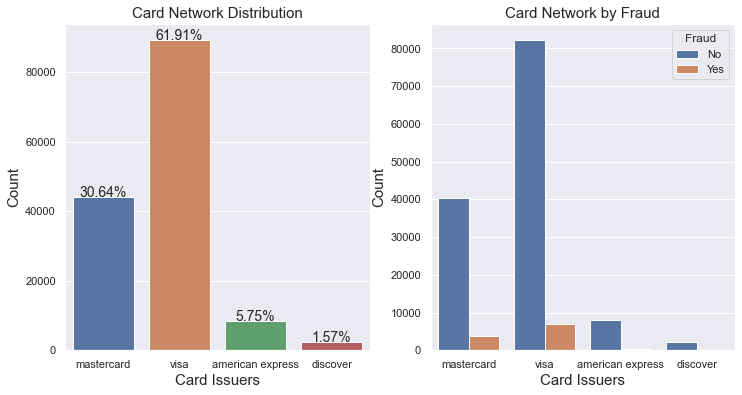

In [29]:
plt.figure(figsize=(12,6))

total = len(train_full_cat)

plt.subplot(121)
g = sns.countplot(x = 'card4', data = train_full_cat)
g.set_title('Card Network Distribution', fontsize = 15)
g.set_xlabel("Card Issuers", fontsize=15)
g.set_ylabel("Count", fontsize=15)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 

plt.subplot(122)
g1 = sns.countplot(x='card4', hue='isFraud', data=train)
g1.set_title('Card Network by Fraud', fontsize = 15)
g1.set_xlabel("Card Issuers", fontsize=15)
g1.set_ylabel("Count", fontsize=15)
plt.legend(title='Fraud', loc='best', labels=['No', 'Yes'])

Observation: Visa card accounts for the highest instances of fraud, but this also because visa is the most popular card type. 

In [30]:
train[train['isFraud'] == 1]['card4'].value_counts(normalize = True)

visa                0.616419
mastercard          0.346780
american express    0.021143
discover            0.015658
Name: card4, dtype: float64

In [31]:
# grouped table
train.groupby('card4')['isFraud'].value_counts(normalize = True)

card4             isFraud
american express  0          0.971198
                  1          0.028802
discover          0          0.921889
                  1          0.078111
mastercard        0          0.911284
                  1          0.088716
visa              0          0.921970
                  1          0.078030
Name: isFraud, dtype: float64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'american express'),
  Text(1, 0, 'discover'),
  Text(2, 0, 'mastercard'),
  Text(3, 0, 'visa')])

<Figure size 864x864 with 0 Axes>

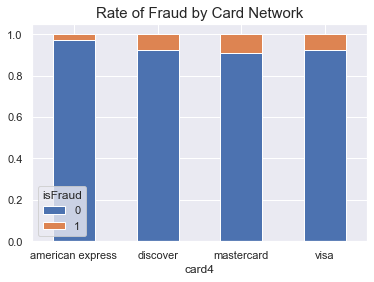

In [34]:
# visualization of table
plt.figure(figsize=(12,12))
b = train.groupby('card4')['isFraud'].value_counts(normalize = True).unstack().plot.bar(stacked = True)
b.set_title('Rate of Fraud by Card Network', fontsize = 15)
plt.xticks(rotation='horizontal')

Conclusion: Visa accounts for 61% of all fraud occurences. However, when normalized by total number of each type, Visa have fraud rate of only 8%, lower than Mastercard and same as Discovercard. Only American Express have significantly lower fraud rate compare to others.

**Card 6: Card Type**

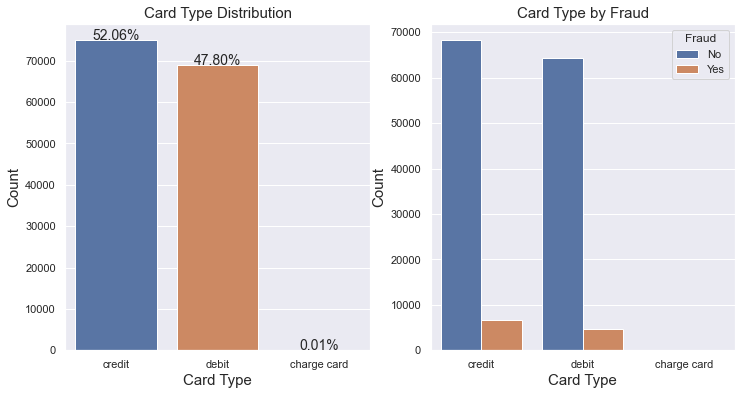

In [33]:
plt.figure(figsize=(12,6))

total = len(train_full_cat)

plt.subplot(121)
g = sns.countplot(x = 'card6', data = train)
g.set_title('Card Type Distribution', fontsize = 15)
g.set_xlabel("Card Type", fontsize=15)
g.set_ylabel("Count", fontsize=15)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 

plt.subplot(122)
g1 = sns.countplot(x='card6', hue='isFraud', data=train)
g1.set_title('Card Type by Fraud', fontsize = 15)
g1.set_xlabel("Card Type", fontsize=15)
g1.set_ylabel("Count", fontsize=15)
plt.legend(title='Fraud', loc='best', labels=['No', 'Yes'])

In [34]:
# grouped table
train.groupby('card6')['isFraud'].value_counts(normalize = True)

card6        isFraud
charge card  0          1.000000
credit       0          0.910867
             1          0.089133
debit        0          0.933096
             1          0.066904
Name: isFraud, dtype: float64

(array([0, 1, 2]),
 [Text(0, 0, 'charge card'), Text(1, 0, 'credit'), Text(2, 0, 'debit')])

<Figure size 864x864 with 0 Axes>

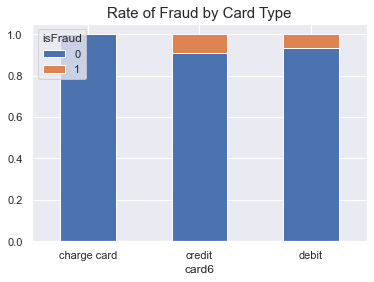

In [35]:
# visualization of table
plt.figure(figsize=(12,12))
b = train.groupby('card6')['isFraud'].value_counts(normalize = True).unstack().plot.bar(stacked = True)
b.set_title('Rate of Fraud by Card Type', fontsize = 15)
plt.xticks(rotation='horizontal')

Observation: Not much difference in fraud rate between credit card and debit card

**Examine Email Domain**

1. Purchaser Email

In [36]:
def visualize_cat_cariable(variable, df=train):
    train[variable].fillna("NA", inplace=True)
    variable_fraud_rate = df.groupby(variable)['isFraud'].value_counts(normalize = True).unstack().fillna(0)[1]
    
    plt.figure(figsize=(12,6))

    g = sns.countplot(x = variable, data = df, order = variable_fraud_rate.index)
    g.set_title('{} Count'.format(variable), fontsize = 15)
    g.set_xlabel("{}".format(variable), fontsize=15)
    g.set_ylabel("Count", fontsize=15)
    plt.xticks(rotation= "vertical")

    r = g.twinx()
    r = sns.pointplot(x = variable_fraud_rate.index, y = variable_fraud_rate, color = "blue")
    r.set_ylabel("Fraud Rate", fontsize = 16, color = "blue")

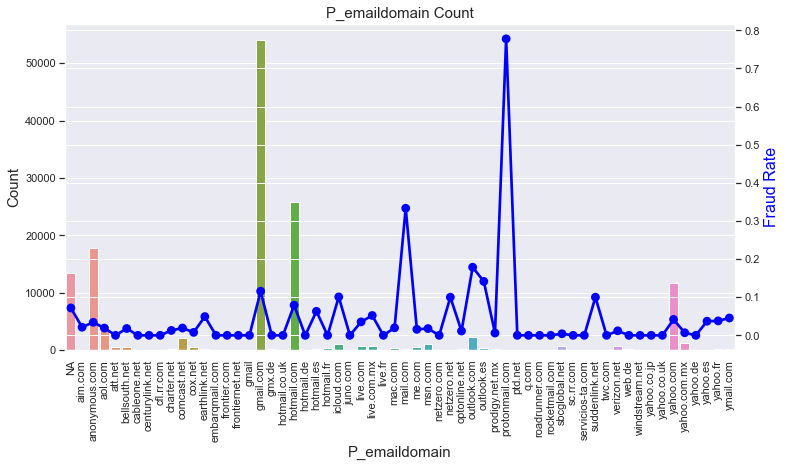

In [37]:
visualize_cat_cariable("P_emaildomain")

In [38]:
train["P_emaildomain"]

0             gmail.com
1         anonymous.com
2             gmail.com
3           hotmail.com
4               aol.com
              ...      
144228         yahoo.fr
144229        gmail.com
144230        gmail.com
144231        gmail.com
144232        gmail.com
Name: P_emaildomain, Length: 144233, dtype: object

Protonmail returns an exemely high fraud rate. Almost 80% of transactions from purchaser using protonmail.com were label fraud. Let's double check this result:

In [39]:
train["P_parent_emaildomain"] = train["P_emaildomain"].str.split('.', expand = True)[[0]]
protonmail_fraud = len(train[(train['P_parent_emaildomain'] == "protonmail") & (train['isFraud'] == 1)])
protonmail_non_fraud = len(train[(train['P_parent_emaildomain'] == "protonmail") & (train['isFraud'] == 0)])

protonmail_fraud_rate = protonmail_fraud/ (protonmail_fraud + protonmail_non_fraud)
print("Number of protonmail fraud transactions:", protonmail_fraud)
print("Number of protonmail non-fraud transactions:", protonmail_non_fraud)
print("Protonmail fraud rate:", protonmail_fraud_rate)

Number of protonmail fraud transactions: 28
Number of protonmail non-fraud transactions: 8
Protonmail fraud rate: 0.7777777777777778


**Examine DeviceType**


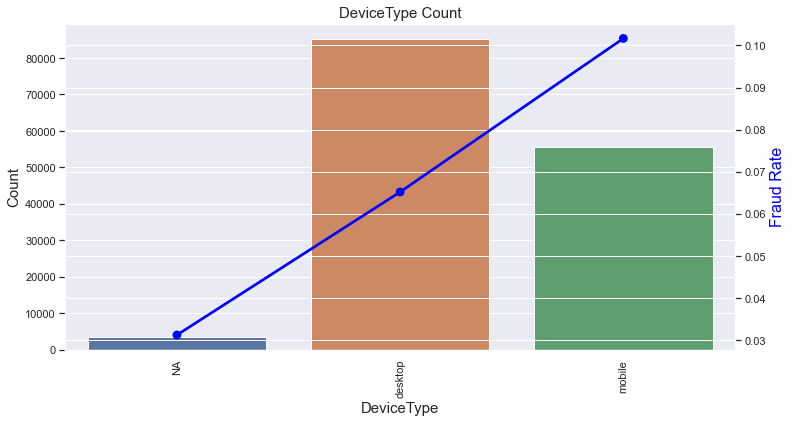

In [40]:
visualize_cat_cariable('DeviceType')

Observation: Fraud rate is higher for mobile device compared to desktop



**Examine DeviceInfo**

In [41]:
train['DeviceInfo'].value_counts()

Windows        47722
iOS Device     19782
MacOS          12573
Trident/7.0     7440
rv:11.0         1901
               ...  
LG-D400            1
LGL41C             1
LGMS345            1
ZA509              1
SM-G903W           1
Name: DeviceInfo, Length: 1786, dtype: int64

Since we have way too many devices, it makes more sense to select a few devices that has non-trivial count. Let's select categories that have more than 500 counts:

In [42]:
devicelist = train.groupby('DeviceInfo').filter(lambda x: len(x) >500)['DeviceInfo'].unique()

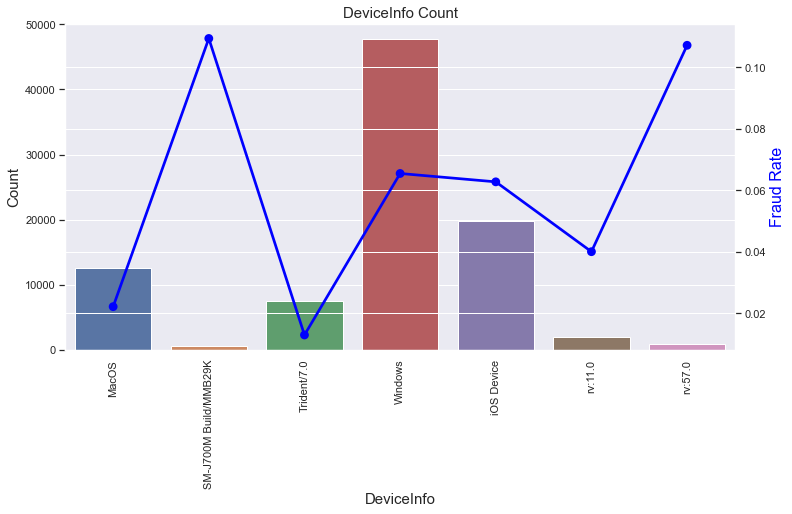

In [43]:
visualize_cat_cariable('DeviceInfo', df = train[train['DeviceInfo'].isin(devicelist)])

**id12-id38**

I choosed to do analyse More informative ones.

1.IP Proxy

In [44]:
# id_list = train.loc[:1, 'id_12':'id_38'].columns
# for i in id_list:
#     print (visualize_cat_cariable(i))

In [45]:
#visualize_cat_cariable('id_23')

Observation: The first notable id plot is the IP status. It is interesting to see the anonymous IP_Proxy would have a higher fraud rate.

Operating Systems

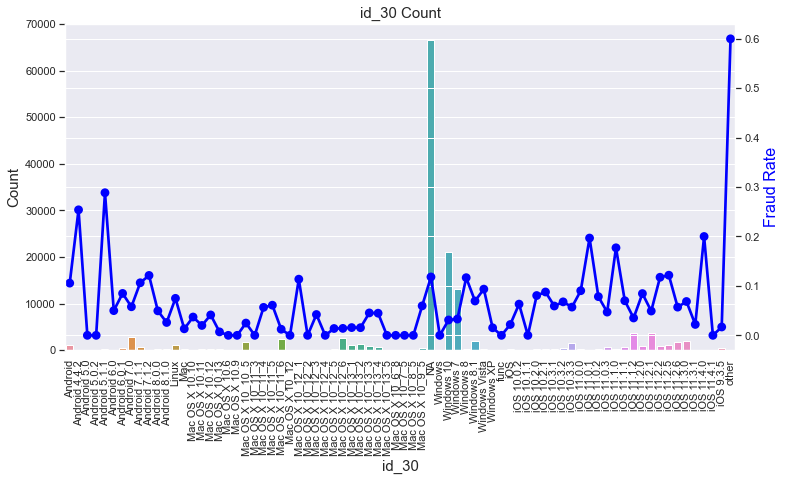

In [46]:
visualize_cat_cariable('id_30')

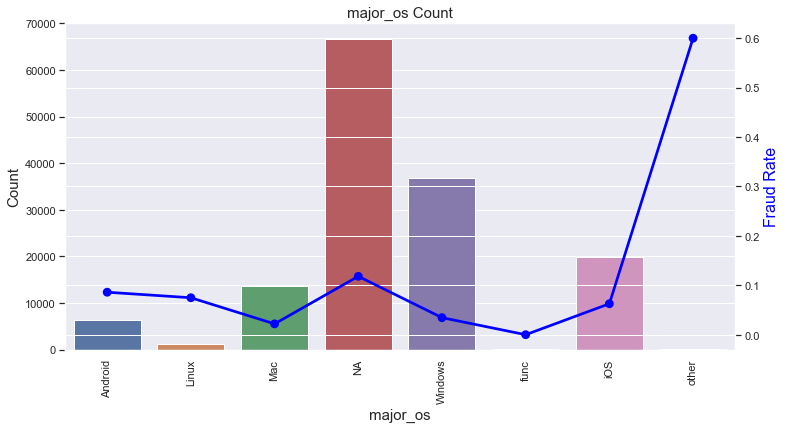

In [47]:
train['major_os'] = train["id_30"].str.split(' ', expand = True)[[0]]

visualize_cat_cariable('major_os')

Observation: The fraud rate across multiple well-known OSs seem fairly similar. "Other" operating systems have a much higher fraud rate.However, it's strange that we see more IOS devices compared to Android, given that Android is the most popular mobile system. Maybe It can be some lack of information in Windows during picking up data process.

**Browsers**

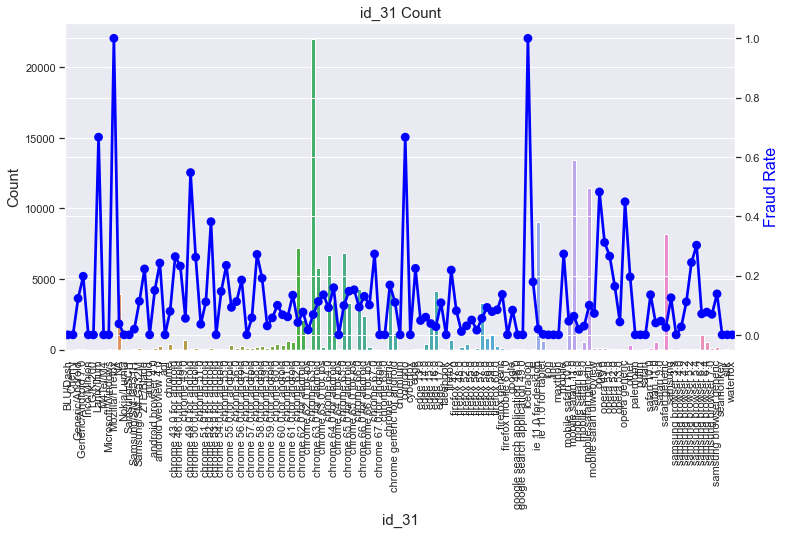

In [48]:
visualize_cat_cariable('id_31')

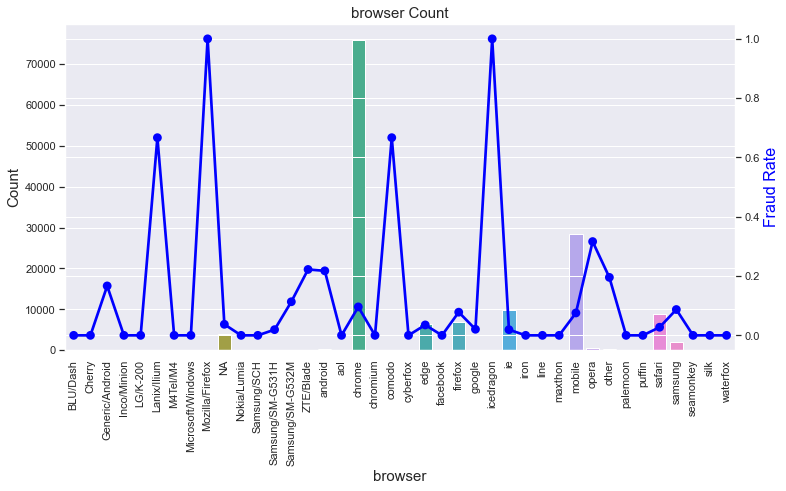

In [49]:
train['browser'] = train["id_31"].str.split(' ', expand = True)[[0]]

visualize_cat_cariable('browser')

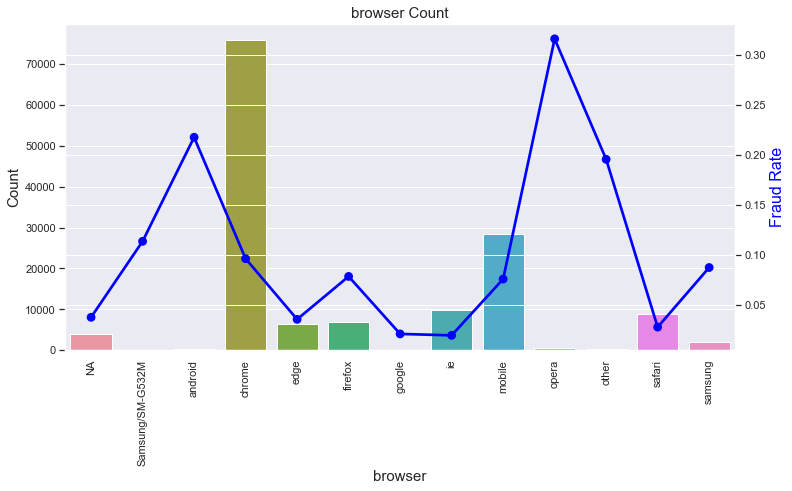

In [50]:
browser_list = train.groupby('browser').filter(lambda x: len(x) > 144)['browser'].unique()
visualize_cat_cariable('browser',  df = train[train['browser'].isin(browser_list)])

Observation: Opera and android browser have relatively high fraud rate

**Explore Numerical Features**

1. Distribution

2. Log of distribution

3. Distribution by target variable

4. Log of distribution by target variable

5. Boxplot comparison between fraud and non-fraud

**Examine Transaction Amount**

In [51]:
def visualize_num_variable(variable, df=train):
    plt.figure(figsize=(12,18))
    plt.suptitle('Distribution of: {}'.format(variable), fontsize=22)

    plt.subplot(321)
    sns.distplot(df[variable], kde= False)
    plt.title('{} Distribution'.format(variable), fontsize = 15)

    plt.subplot(322)
    sns.distplot(np.log10(df[variable]), kde= False)
    plt.title('Log-transformed Distribution', fontsize = 15)


    plt.subplot(323)
    sns.distplot(df[df['isFraud'] == 0][variable], color = 'skyblue', kde= False, label = 'Not Fraud')
    sns.distplot(df[df['isFraud'] == 1][variable], color = 'red', kde= False , label = 'Fraud')
    plt.title('Fraud vs Non-Fraud Distribution', fontsize = 15)
    plt.legend()

    plt.subplot(324)
    sns.distplot(np.log10(df[df['isFraud'] == 0][variable]), color = 'skyblue', kde= False, label = 'Not Fraud')
    sns.distplot(np.log10(df[df['isFraud'] == 1][variable]), color = 'red', kde= False , label = 'Fraud')
    plt.title('Log-transformed Distribution', fontsize = 15)
    plt.legend()
    
    
    plt.subplot(313)
    sns.boxplot(x = 'isFraud', y = variable, data = df)
    plt.title(f'{variable} by Fraud', fontsize = 15,  weight='bold')
    

/Users/burcakbal/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/burcakbal/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/burcakbal/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

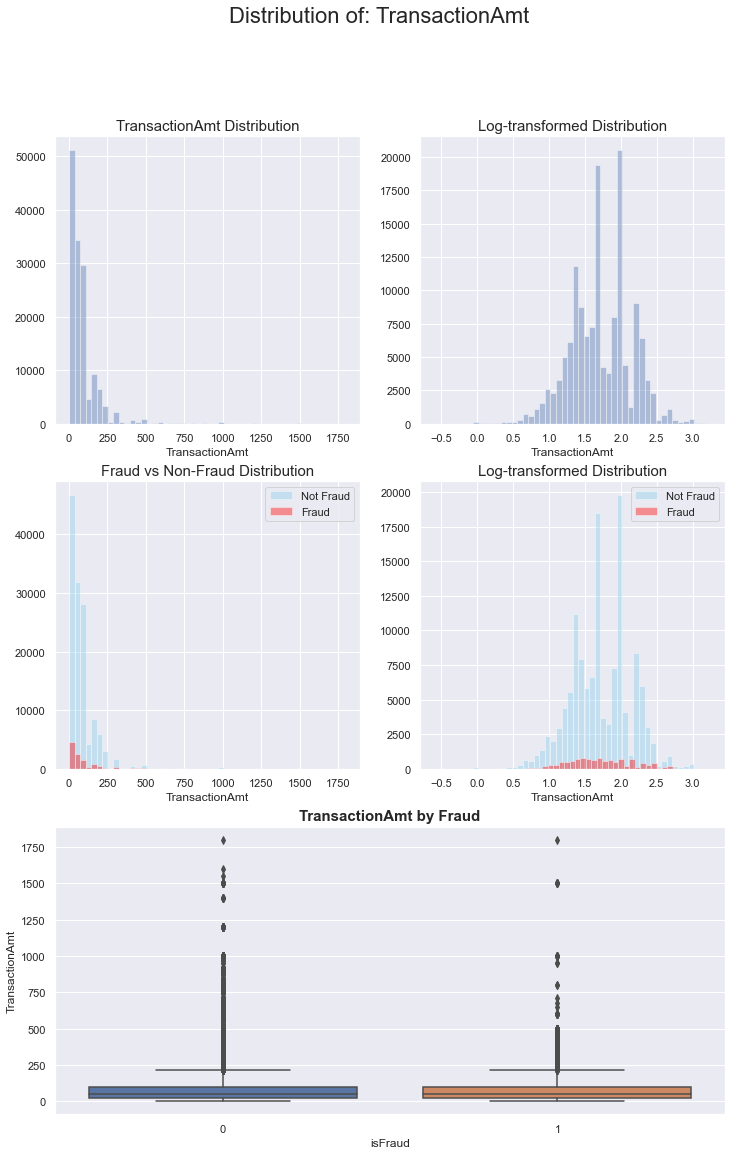

In [52]:
visualize_num_variable('TransactionAmt')

Observation: 

1. TransactionAmt has right-skewed distribution: most transactions are small (less than $200)
2. There is little difference between distribution and average amount for fraud and non-fraud

**Examine Transaction DT**

/Users/burcakbal/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/burcakbal/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/burcakbal/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

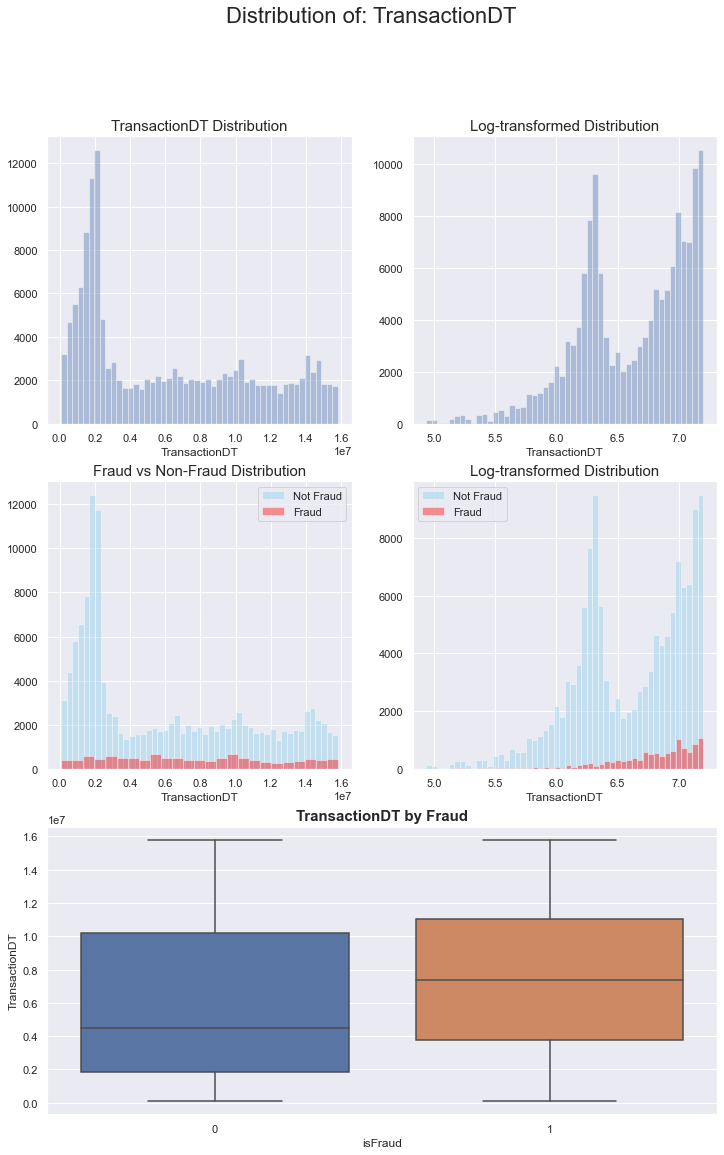

In [53]:
visualize_num_variable('TransactionDT')

Observation: There is a large number of non-fraud transactions generated at a certain period . This discrepancy also causing the difference in our boxplot.

Possible Improvement: I should try undersampling the period of non-fraud so that we have less imbalance issue for that particular period.

In [54]:
train.groupby("TransactionDT")["isFraud"].count()

TransactionDT
86506       1
86535       1
86549       1
86555       1
86620       1
           ..
15810802    1
15810876    1
15810912    1
15810935    1
15811030    1
Name: isFraud, Length: 142734, dtype: int64

**Examine Distance 2**

Dist1 contains no values. For dist2, we also running into two problems:

Missing values:

Solution: keeping only the non-null rows in dist2.

Zero values:

Zero values cause log transform to return infinity values

Solution: add small amount to 0s to avoid infinity

Negative values

The logarithm is only defined for positive numbers. I could perhaps take the log(x+n), where n is the offset values that make the min negative value > 0. However, for such data 0 has a meaning (equality!) that should be respected. Unless I know the meaning of the data, I cannot make arbitrary transformation.

Solution: no solution, omit the log-transformation graphs

Let's update our graphing function with this implementation

In [55]:
def visualize_num_variable(variable, df=train.copy()):
    # check for homogeneity:
    if len(df[variable].unique()) <= 1:
        print('{} is a homogeneous set'.format(variable))
        return
    
    # check for NAs and Zeros
    if df[variable].isnull().values.any():
        df = train.dropna(subset=[variable])

    if df[variable].min() < 0:
        plt.figure(figsize=(12,12))
        plt.suptitle('Distribution of: {}'.format(variable), fontsize=22)
    
        plt.subplot(221)
        sns.distplot(df[variable], kde= False)
        plt.title('{} Distribution'.format(variable), fontsize = 15)
        
        plt.subplot(222)
        sns.distplot(df[df['isFraud'] == 0][variable], color = 'skyblue', kde= False, label = 'Not Fraud')
        sns.distplot(df[df['isFraud'] == 1][variable], color = 'red', kde= False , label = 'Fraud')
        plt.title('Fraud vs Non-Fraud Distribution', fontsize = 15)
        plt.legend()
        
        plt.subplot(212)
        sns.boxplot(x = 'isFraud', y = variable, data = df)
        plt.title('{} by Fraud'.format(variable), fontsize = 15,  weight='bold')
        
    else:
        smallest_value = df[df[variable] != 0][variable].min()
        if df[variable].min() == 0:
            df[variable].replace(0, smallest_value/10, inplace=True)       

        plt.figure(figsize=(12,18))
        plt.text(x=0.5, y=0.5,
                 s="Zeros have been replaced with {} to avoid log infinity".format(smallest_value/10),
                 fontsize=12,horizontalalignment='center')

        plt.suptitle('Distribution of: {}'.format(variable), fontsize=22)

        plt.subplot(321)
        sns.distplot(df[variable], kde= False)
        plt.title('{} Distribution'.format(variable), fontsize = 15)

        plt.subplot(322)
        sns.distplot(np.log10(df[variable]), kde= False)
        plt.title('Log-transformed Distribution', fontsize = 15)


        plt.subplot(323)
        sns.distplot(df[df['isFraud'] == 0][variable], color = 'skyblue', kde= False, label = 'Not Fraud')
        sns.distplot(df[df['isFraud'] == 1][variable], color = 'red', kde= False , label = 'Fraud')
        plt.title('Fraud vs Non-Fraud Distribution', fontsize = 15)
        plt.legend()

        plt.subplot(324)
        sns.distplot(np.log10(df[df['isFraud'] == 0][variable]), color = 'skyblue', kde= False, label = 'Not Fraud')
        sns.distplot(np.log10(df[df['isFraud'] == 1][variable]), color = 'red', kde= False , label = 'Fraud')
        plt.title('Log-transformed Distribution', fontsize = 15)
        plt.legend()

        plt.subplot(325)
        sns.boxplot(x = 'isFraud', y = variable, data = df)
        plt.title('{} by Fraud'.format(variable), fontsize = 15,  weight='bold')


**Examine C features**

/Users/burcakbal/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/burcakbal/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/burcakbal/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

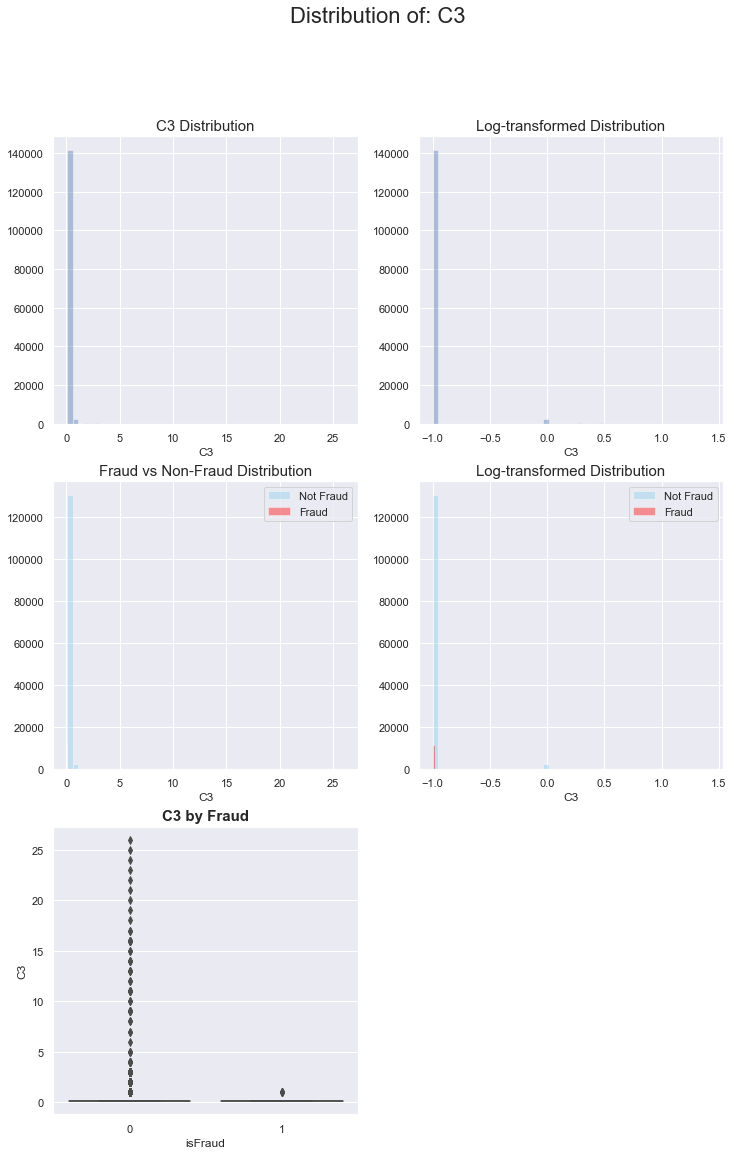

In [56]:
visualize_num_variable('C3')

Observation: Higher values of C3 associated with no-fraud.

C5 and C9 are homogeneous columns.

In [57]:
train.filter(regex="C")

,ProductCD,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
0,H,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
1,H,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
2,C,1.0,4.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,2.0,2.0,1.0
3,C,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
4,H,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,C,1.0,9.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,2.0,1.0,1.0,1.0,1.0
144229,R,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
144230,C,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
144231,R,2.0,3.0,0.0,4.0,0.0,3.0,0.0,3.0,0.0,3.0,2.0,0.0,4.0,2.0


In [58]:
train.groupby("isFraud")["C5"].count()

isFraud
0    132915
1     11318
Name: C5, dtype: int64

**Examine D Features**

**Outputs:**

1)ProductType:
*C is the most fraud frequent product type. But C has low dollar values.

2)Card:
*Card 1 :can show us id of card. Because, this card has more unique values than other card types.
*Card 4 :Visa card has the highest amount fraud instances. %60 percent of all of the fraud instances id coming from Visa card. But Visa is the most famous card in the world.
         Visa card has %8 fraud instances, all of the remain instances is no_fraud instances. Mastercard and discover card has more fraud rate then Visa card.
         American Express have significantly lower fraud rate compare to others.
*Card6  :It shows type of cards. Not much difference in fraud rate between credit card and debit card.

3)Email Domain: The most frequency fraud rate -->Protonmail:"ProtonMail is incorporated in Switzerland and all our servers are located in Switzerland.This means all user data is protected by strict Swiss privacy laws".

4)M1-M9:
*M4 has just only values. Not much variation in fraud rate between values of M4

5)Device Type:
*The most frequent : Windows>IOS device>MacOS>Trident
*Fraud Rate: 5M-J700M Build/MMB29K<rv:57:0>Windows>IOS

6)id12-id38
*IP_Proxy:anonymous IP_Proxy would have a higher fraud rate. It make sense that the person would want to protect his/her identity.
*Operating System:Other have much higher fraud rate. IOS has more fraud than Widnows.But windows is the most popular system. It can be some lackes of data about Windows.
Other>IOS>Windows
*Browsers:Opera and Android browsers have relatively high fraud ratein limited data. But if I look at all of fraud instances(unlimited data),we can see icedragon,comodo,Mozilla have high rate fraud instances.

7)TransactionAmt:
*Transaction Amt has right-skewed distrubition.Most transaction are small(less than $200)
*There is little differences between distrubition and avarage amount for fraud and non-fraud.

8)TransactionDT
*Large of number of no-fraud transaction generated at a certain period. Imbalance data problem is causing some disperancy.

9)C features:(C3,C5,C9)
*Higher values of C3 associated with no-fraud.


In [59]:
import datetime

START_DATE = '2017-11-30'
startdate = datetime.datetime.strptime(START_DATE, "%Y-%m-%d")
train['Date'] = train['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds=x)))
train['ymd'] = train['Date'].dt.year.astype(str) + '-' + train['Date'].dt.month.astype(str) + '-' + train['Date'].dt.day.astype(str)
train['year_month'] = train['Date'].dt.year.astype(str) + '-' + train['Date'].dt.month.astype(str)
train['weekday'] = train['Date'].dt.dayofweek.astype(str)
train['hour'] = train['Date'].dt.hour.astype(str)
train['day'] = train['Date'].dt.day.astype(str)

#First creating day feature
# train['day'] = (train['TransactionDT']//(3600*24)-1)%7
# test['day'] = (test['TransactionDT']//(3600*24)-1)%7
# #Then creating hour feature
# train['hour'] = (train['TransactionDT']//(3600))%24
# test['hour'] = (test['TransactionDT']//(3600))%24


<AxesSubplot:xlabel='year_month'>

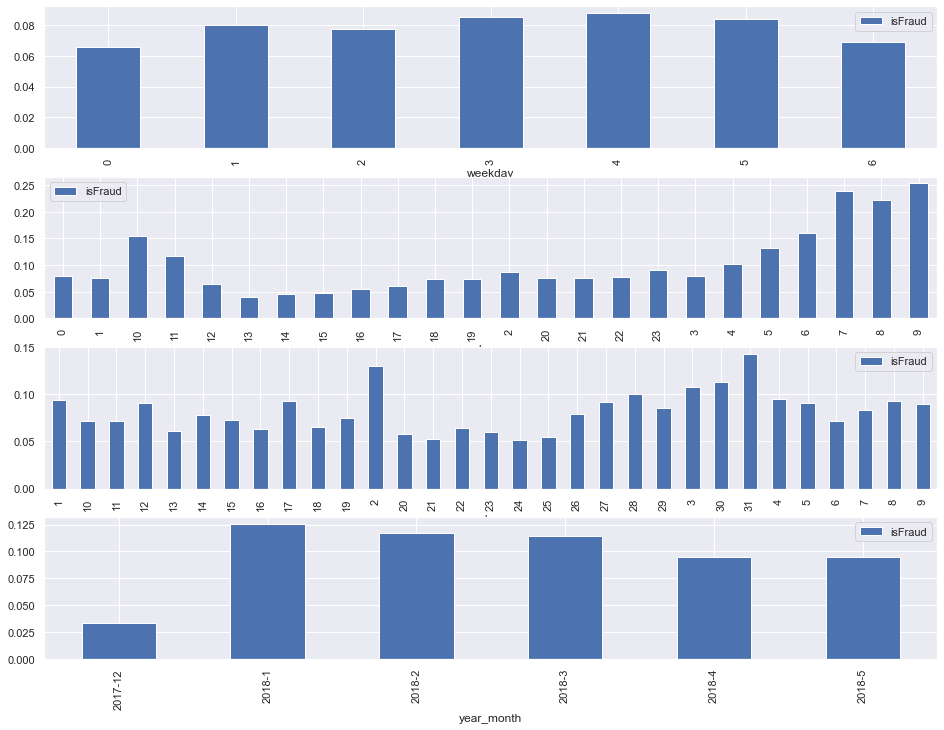

In [60]:

fig,ax = plt.subplots(4, 1, figsize=(16,12))

train.groupby('weekday')['isFraud'].mean().to_frame().plot.bar(ax=ax[0])
train.groupby('hour')['isFraud'].mean().to_frame().plot.bar(ax=ax[1])
train.groupby('day')['isFraud'].mean().to_frame().plot.bar(ax=ax[2])
train.groupby('year_month')['isFraud'].mean().to_frame().plot.bar(ax=ax[3])
#sns.barplot=(x="hour",y="percentage",hue="isFraud",data=train)

In [61]:
df = train.groupby('hour')['isFraud'].mean().to_frame()
df.sort_values(by='isFraud', ascending=False).head(10)

,isFraud
hour,
9,0.253308
7,0.238170
8,0.221751
6,0.159782
10,0.154074
5,0.131293
11,0.116129
4,0.102560
23,0.090761


Observation: 

*7-8-9 oclock have high fraud rates. 
*The last day of month has also high rate if fraud.
*

In [62]:
numid_cols = [f'id_{str(i).zfill(2)}' for i in range(1,12)]

In [63]:
ccols = [f'C{i}' for i in range(1,15)]
dcols = [f'D{i}' for i in range(1,16)]
mcols = [f'M{i}' for i in range(1,10)]
vcols = [f'V{i}' for i in range(1,340)]

<AxesSubplot:>

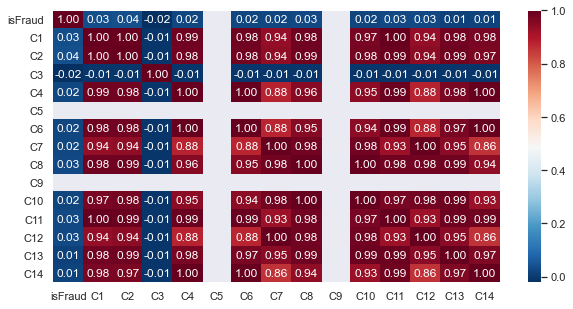

In [64]:
plt.figure(figsize=(10,5))

corr = train[['isFraud'] + ccols].corr()
sns.heatmap(corr, annot=True, fmt='.2f',cmap='RdBu_r')

In [65]:
train.drop(["C1","C4","C5","C9","C6","C7","C8","C10","C11","C12","C13","C14"],axis=1,inplace=True)

<AxesSubplot:>

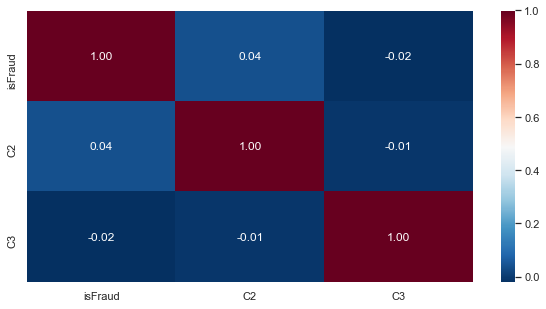

In [66]:
plt.figure(figsize=(10,5))

corr = train[['isFraud',"C2","C3"]].corr()
sns.heatmap(corr, annot=True, fmt='.2f',cmap='RdBu_r')

In [67]:
id_cols = [col for col in train.columns if col[0]+col[1] == 'id']
train[id_cols].head()

,id_01,id_02,id_05,id_06,id_09,id_10,id_11,id_12,id_13,id_14,...,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38
0,0.0,70787.0,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,...,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T
1,-5.0,98945.0,0.0,-5.0,NaN,NaN,100.0,NotFound,49.0,-300.0,...,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T
2,-5.0,191631.0,0.0,0.0,0.0,0.0,100.0,NotFound,52.0,NaN,...,Found,NA,chrome 62.0,NaN,NaN,NaN,F,F,T,T
3,-5.0,221832.0,0.0,-6.0,NaN,NaN,100.0,NotFound,52.0,NaN,...,NotFound,NA,chrome 62.0,NaN,NaN,NaN,F,F,T,T
4,0.0,7460.0,1.0,0.0,0.0,0.0,100.0,NotFound,NaN,-300.0,...,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T


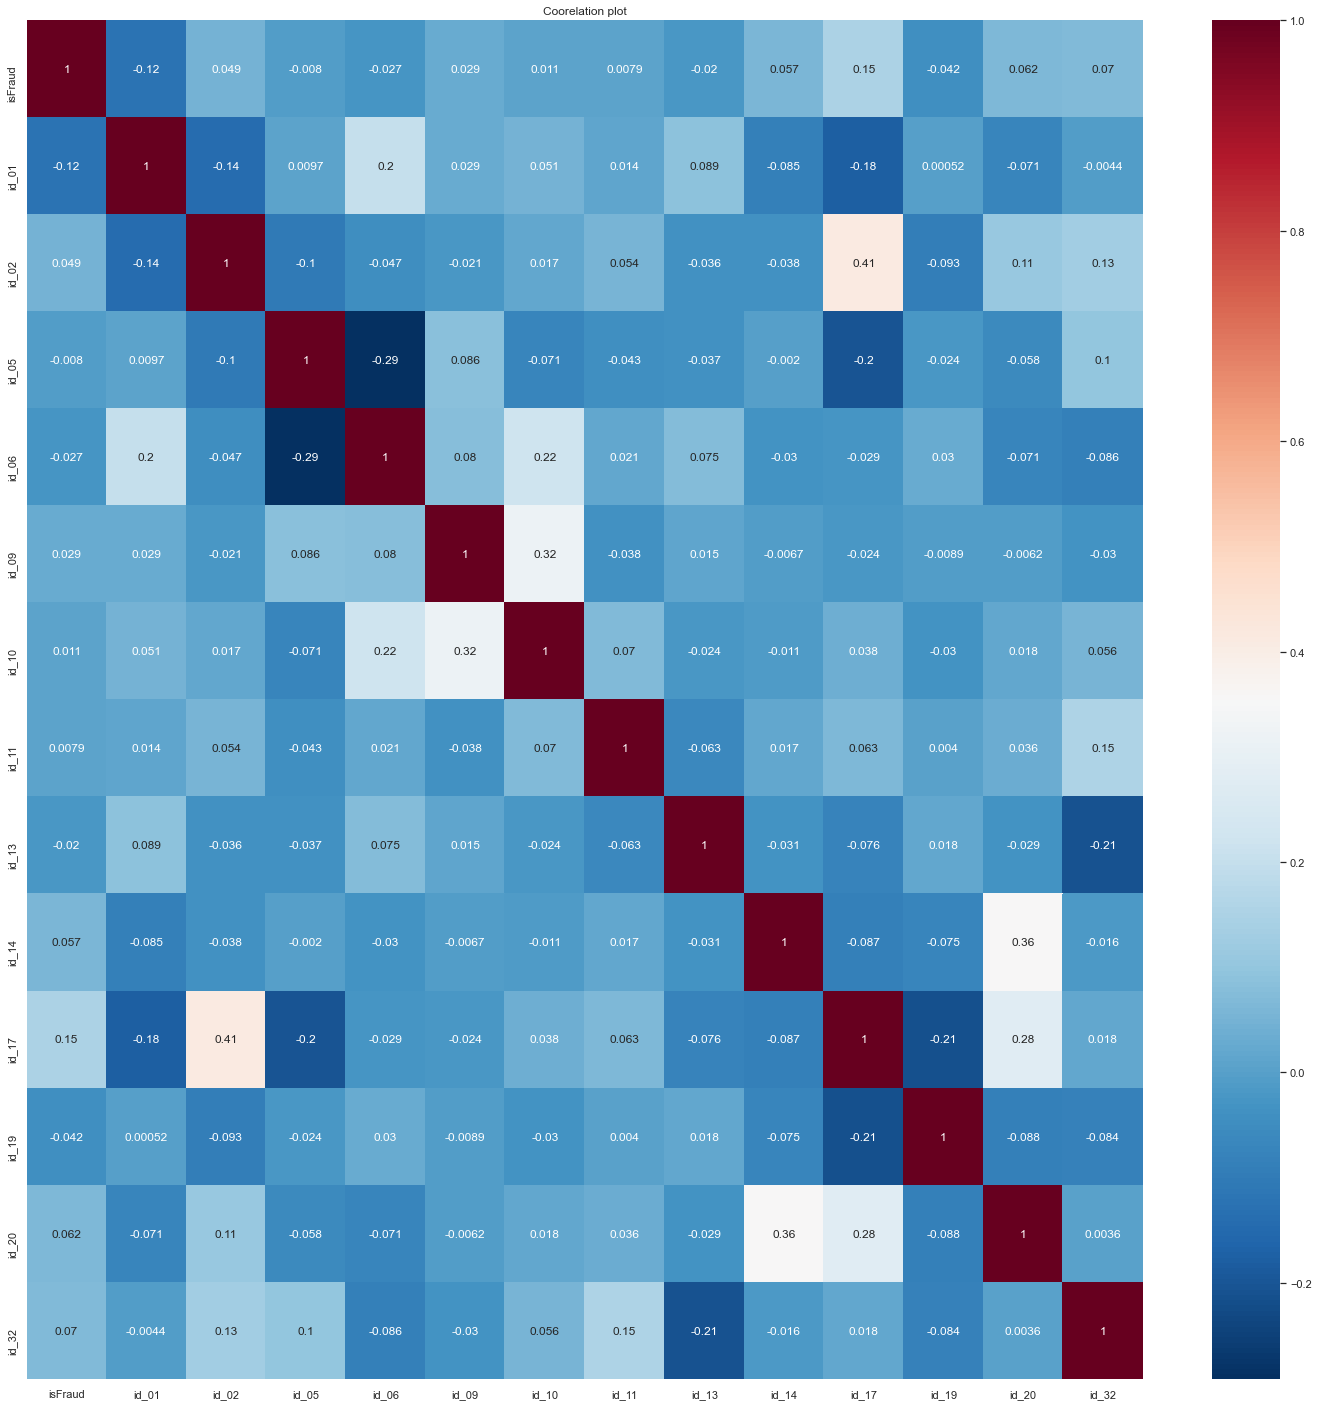

In [68]:
fig,axes = plt.subplots(1,1,figsize=(25,25))
df_corr = train[["isFraud"]+id_cols].corr()
sns.heatmap(df_corr,annot=True,cmap='RdBu_r')
axes.title.set_text('Coorelation plot')
plt.show()

**Generating some new Features**

In [69]:
def id_split(dataframe):
    train['device_name'] = train['DeviceInfo'].str.split('/', expand=True)[0]
    dataframe['OS_id_30'] = dataframe['id_30'].str.split(' ', expand=True)[0]
    dataframe['version_id_30'] = dataframe['id_30'].str.split(' ', expand=True)[1]
    dataframe['browser_id_31'] = dataframe['id_31'].str.split(' ', expand=True)[0]
    dataframe['version_id_31'] = dataframe['id_31'].str.split(' ', expand=True)[1]
# Screen height and width
    dataframe['screen_width'] = dataframe['id_33'].str.split('x', expand=True)[0]
    dataframe['screen_height'] = dataframe['id_33'].str.split('x', expand=True)[1]
# Grouping of Phone branch
    dataframe.loc[dataframe['device_name'].str.contains('SM', na=False), 'device_name'] = 'Samsung'
    dataframe.loc[dataframe['device_name'].str.contains('SAMSUNG', na=False), 'device_name'] = 'Samsung'
    dataframe.loc[dataframe['device_name'].str.contains('GT-', na=False), 'device_name'] = 'Samsung'
    dataframe.loc[dataframe['device_name'].str.contains('Moto G', na=False), 'device_name'] = 'Motorola'
    dataframe.loc[dataframe['device_name'].str.contains('Moto', na=False), 'device_name'] = 'Motorola'
    dataframe.loc[dataframe['device_name'].str.contains('moto', na=False), 'device_name'] = 'Motorola'
    dataframe.loc[dataframe['device_name'].str.contains('LG-', na=False), 'device_name'] = 'LG'
    dataframe.loc[dataframe['device_name'].str.contains('rv:', na=False), 'device_name'] = 'RV'
    dataframe.loc[dataframe['device_name'].str.contains('HUAWEI', na=False), 'device_name'] = 'Huawei'
    dataframe.loc[dataframe['device_name'].str.contains('ALE-', na=False), 'device_name'] = 'Huawei'
    dataframe.loc[dataframe['device_name'].str.contains('-L', na=False), 'device_name'] = 'Huawei'
    dataframe.loc[dataframe['device_name'].str.contains('Blade', na=False), 'device_name'] = 'ZTE'
    dataframe.loc[dataframe['device_name'].str.contains('BLADE', na=False), 'device_name'] = 'ZTE'
    dataframe.loc[dataframe['device_name'].str.contains('Linux', na=False), 'device_name'] = 'Linux'
    dataframe.loc[dataframe['device_name'].str.contains('XT', na=False), 'device_name'] = 'Sony'
    dataframe.loc[dataframe['device_name'].str.contains('HTC', na=False), 'device_name'] = 'HTC'
    dataframe.loc[dataframe['device_name'].str.contains('ASUS', na=False), 'device_name'] = 'Asus'
# Assining of Other
    dataframe.loc[dataframe.device_name.isin(dataframe.device_name.value_counts()[dataframe.device_name.value_counts() < 200].index), 'device_name'] = "Others"
      
    return dataframe

In [70]:
train=id_split(train)

In [71]:


train['TransactionAmt_Log'] = np.log(train['TransactionAmt'])
#train['TransactionAmt_decimal'] = ((train['TransactionAmt'] - train['TransactionAmt'].astype(int)) * 1000).astype(int)
train[['P_emaildomain_1', 'P_emaildomain_2', 'P_emaildomain_3']] = train['P_emaildomain'].str.split('.', expand=True)
train['P_isproton']=(train['P_emaildomain']=='protonmail.com').astype(float)
a = np.zeros(train.shape[0])
train["lastest_browser"] = a
del a

In [72]:
def setbrowser(train):
    train.loc[train["id_31"]=="samsung browser 7.0",'lastest_browser']=1
    train.loc[train["id_31"]=="opera 53.0",'lastest_browser']=1
    train.loc[train["id_31"]=="mobile safari 10.0",'lastest_browser']=1
    train.loc[train["id_31"]=="google search application 49.0",'lastest_browser']=1
    train.loc[train["id_31"]=="firefox 60.0",'lastest_browser']=1
    train.loc[train["id_31"]=="edge 17.0",'lastest_browser']=1
    train.loc[train["id_31"]=="chrome 69.0",'lastest_browser']=1
    train.loc[train["id_31"]=="chrome 67.0 for android",'lastest_browser']=1
    train.loc[train["id_31"]=="chrome 63.0 for android",'lastest_browser']=1
    train.loc[train["id_31"]=="chrome 63.0 for ios",'lastest_browser']=1
    train.loc[train["id_31"]=="chrome 64.0",'lastest_browser']=1
    train.loc[train["id_31"]=="chrome 64.0 for android",'lastest_browser']=1
    train.loc[train["id_31"]=="chrome 64.0 for ios",'lastest_browser']=1
    train.loc[train["id_31"]=="chrome 65.0",'lastest_browser']=1
    train.loc[train["id_31"]=="chrome 65.0 for android",'lastest_browser']=1
    train.loc[train["id_31"]=="chrome 65.0 for ios",'lastest_browser']=1
    train.loc[train["id_31"]=="chrome 66.0",'lastest_browser']=1
    train.loc[train["id_31"]=="chrome 66.0 for android",'lastest_browser']=1
    train.loc[train["id_31"]=="chrome 66.0 for ios",'lastest_browser']=1
    return train

In [73]:
train = setbrowser(train)


**Dropping process for some unnecessarry values**

In [74]:
train.drop(["TransactionDT",'DeviceInfo',"id_30","id_31","id_33","device_name",'P_emaildomain'],axis=1,inplace=True)

In [75]:
train

,TransactionID,id_01,id_02,id_05,id_06,id_09,id_10,id_11,id_12,id_13,...,browser_id_31,version_id_31,screen_width,screen_height,TransactionAmt_Log,P_emaildomain_1,P_emaildomain_2,P_emaildomain_3,P_isproton,lastest_browser
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,...,samsung,browser,2220,1080,3.912023,gmail,com,None,0.0,0.0
1,2987008,-5.0,98945.0,0.0,-5.0,NaN,NaN,100.0,NotFound,49.0,...,mobile,safari,1334,750,2.708050,anonymous,com,None,0.0,0.0
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,100.0,NotFound,52.0,...,chrome,62.0,NaN,NaN,4.329245,gmail,com,None,0.0,0.0
3,2987011,-5.0,221832.0,0.0,-6.0,NaN,NaN,100.0,NotFound,52.0,...,chrome,62.0,NaN,NaN,2.803057,hotmail,com,None,0.0,0.0
4,2987016,0.0,7460.0,1.0,0.0,0.0,0.0,100.0,NotFound,NaN,...,chrome,62.0,1280,800,3.401197,aol,com,None,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,3577521,-15.0,145955.0,0.0,0.0,0.0,0.0,100.0,NotFound,27.0,...,chrome,66.0,NaN,NaN,3.889307,yahoo,fr,None,0.0,1.0
144229,3577526,-5.0,172059.0,1.0,-5.0,NaN,NaN,100.0,NotFound,27.0,...,chrome,55.0,855,480,5.521461,gmail,com,None,0.0,0.0
144230,3577529,-20.0,632381.0,-1.0,-36.0,NaN,NaN,100.0,NotFound,27.0,...,chrome,65.0,NaN,NaN,4.301874,gmail,com,None,0.0,1.0
144231,3577531,-5.0,55528.0,0.0,-7.0,0.0,0.0,100.0,NotFound,27.0,...,chrome,66.0,2560,1600,5.991465,gmail,com,None,0.0,1.0


In [76]:
vcols_2=train.filter(regex="V").columns.to_list()

In [78]:
len(vcols_2)

245

In [79]:
# fig,axes = plt.subplots(1,1,figsize=(25,25))
# df_corr = train[["isFraud"]+vcols].corr()
# sns.heatmap(df_corr,annot=True,cmap='RdBu_r')
# axes.title.set_text('Coorelation plot')
# plt.show()

**I investigated all of the correlation for all V columns**

In [80]:
df_corr = train[vcols_2].corr()

# Create correlation matrix
corr_matrix = df_corr.abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]


<ipython-input-80-86bb80bda9f1>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [81]:
# Drop features 
train.drop(to_drop, axis=1, inplace=True)

In [82]:
train

,TransactionID,id_01,id_02,id_05,id_06,id_09,id_10,id_11,id_12,id_13,...,browser_id_31,version_id_31,screen_width,screen_height,TransactionAmt_Log,P_emaildomain_1,P_emaildomain_2,P_emaildomain_3,P_isproton,lastest_browser
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,...,samsung,browser,2220,1080,3.912023,gmail,com,None,0.0,0.0
1,2987008,-5.0,98945.0,0.0,-5.0,NaN,NaN,100.0,NotFound,49.0,...,mobile,safari,1334,750,2.708050,anonymous,com,None,0.0,0.0
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,100.0,NotFound,52.0,...,chrome,62.0,NaN,NaN,4.329245,gmail,com,None,0.0,0.0
3,2987011,-5.0,221832.0,0.0,-6.0,NaN,NaN,100.0,NotFound,52.0,...,chrome,62.0,NaN,NaN,2.803057,hotmail,com,None,0.0,0.0
4,2987016,0.0,7460.0,1.0,0.0,0.0,0.0,100.0,NotFound,NaN,...,chrome,62.0,1280,800,3.401197,aol,com,None,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,3577521,-15.0,145955.0,0.0,0.0,0.0,0.0,100.0,NotFound,27.0,...,chrome,66.0,NaN,NaN,3.889307,yahoo,fr,None,0.0,1.0
144229,3577526,-5.0,172059.0,1.0,-5.0,NaN,NaN,100.0,NotFound,27.0,...,chrome,55.0,855,480,5.521461,gmail,com,None,0.0,0.0
144230,3577529,-20.0,632381.0,-1.0,-36.0,NaN,NaN,100.0,NotFound,27.0,...,chrome,65.0,NaN,NaN,4.301874,gmail,com,None,0.0,1.0
144231,3577531,-5.0,55528.0,0.0,-7.0,0.0,0.0,100.0,NotFound,27.0,...,chrome,66.0,2560,1600,5.991465,gmail,com,None,0.0,1.0


In [83]:
train.to_csv('train_pre_feat.csv', index=False)

**I seperated train dataset as numeric column, categoric column**

In [84]:
numeric_cols =  [
    'TransactionAmt', 'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 
    'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 
    'D12', 'D13', 'D14', 'D15', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 
    'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 
    'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 
    'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 
    'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 
    'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 
    'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 
    'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 
    'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 
    'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 
    'V133', 'V134', 'V135', 'V136', 'V137', 'V138', 'V139', 'V140', 'V141', 'V142', 'V143', 'V144', 
    'V145', 'V146', 'V147', 'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 
    'V157', 'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166', 'V167', 'V168', 
    'V169', 'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 
    'V181', 'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189', 'V190', 'V191', 'V192', 
    'V193', 'V194', 'V195', 'V196', 'V197', 'V198', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 
    'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216', 
    'V217', 'V218', 'V219', 'V220', 'V221', 'V222', 'V223', 'V224', 'V225', 'V226', 'V227', 'V228', 
    'V229', 'V230', 'V231', 'V232', 'V233', 'V234', 'V235', 'V236', 'V237', 'V238', 'V239', 'V240', 
    'V241', 'V242', 'V243', 'V244', 'V245', 'V246', 'V247', 'V248', 'V249', 'V250', 'V251', 'V252', 
    'V253', 'V254', 'V255', 'V256', 'V257', 'V258', 'V259', 'V260', 'V261', 'V262', 'V263', 'V264', 
    'V265', 'V266', 'V267', 'V268', 'V269', 'V270', 'V271', 'V272', 'V273', 'V274', 'V275', 'V276', 
    'V277', 'V278', 'V279', 'V280', 'V281', 'V282', 'V283', 'V284', 'V285', 'V286', 'V287', 'V288', 
    'V289', 'V290', 'V291', 'V292', 'V293', 'V294', 'V295', 'V296', 'V297', 'V298', 'V299', 'V300', 
    'V301', 'V302', 'V303', 'V304', 'V305', 'V306', 'V307', 'V308', 'V309', 'V310', 'V311', 'V312', 
    'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320', 'V321', 'V322', 'V323', 'V324', 
    'V325', 'V326', 'V327', 'V328', 'V329', 'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 
    'V337', 'V338', 'V339', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 
    'id_09', 'id_10', 'id_11'
]

In [85]:
cat_cols = (['ProductCD'] + 
            ['card%d' % i for i in range(1, 7)] + 
            ['addr1', 'addr2', 'P_emaildomain', 'R_emaildomain'] + 
            ['M%d' % i for i in range(1, 10)] + 
            ['DeviceType', 'DeviceInfo'] +
            ['id_%d' % i for i in range(12, 39)])

In [86]:
cat_col=list(set(train.columns.to_list()).intersection(cat_cols))

In [87]:
#pkl.dump(train.columns.to_list(),open("train_column_list.p","wb"))

In [88]:
num_col=list(set(train.columns.to_list()).intersection(numeric_cols))

In [89]:
cat_col=cat_col+["browser_id_31","browser","major_os","P_parent_emaildomain","version_id_30","OS_id_30","lastest_browser","P_isproton",
"P_emaildomain_3","P_emaildomain_2","P_emaildomain_1","version_id_31","browser_id_31","Date","ymd","year_month","weekday","hour","day",]

In [90]:
num_col=num_col+["TransactionID","TransactionAmt_Log","screen_height","screen_width"]

In [91]:
len(num_col)+len(cat_col)

165

In [92]:
# remaincol=["browser_id_31","version_id_31","screen_width","screen_height","TransactionAmt_Log","P_emaildomain_1",
# "P_emaildomain_2","P_emaildomain_3","P_isproton","lastest_browser","OS_id_30","version_id_30","P_parent_emaildomain","major_os","browser","Date",	"ymd","year_month","weekday","hour","day","browser_id_31","TransactionID"]

**Split of dataset**

In [93]:
X =train.drop('isFraud', axis=1)
y = train[['isFraud']]


In [94]:
len(X.columns)

164

In [95]:
#X.to_csv('X_data.csv', index=False)

In [96]:
#y.to_csv('y_data.csv', index=False)

In [97]:
X_res,y_res=feature_eng(num_col,cat_col,X,y)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

**Baseline Model_Logistic Regression**

/Users/burcakbal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/burcakbal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Figure size 432x288 with 0 Axes>

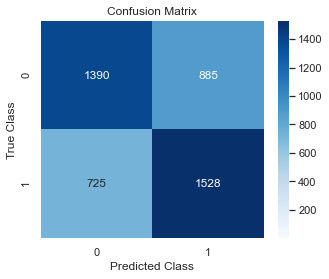

Accuracy: 0.644434628975265
Precision: 0.6332366348943225
Recall: 0.6782068353306702
False positive rate: 0.389010989010989
False negative rate: 0.3217931646693298
F1 score: 0.654950707243892


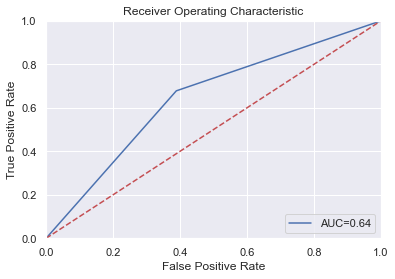

(LogisticRegression(random_state=12), 0.389010989010989, 0.3217931646693298)

In [99]:
logreg(X_train, X_test, y_train, y_test)

/Users/burcakbal/Desktop/FraudDetection/FraudDetection/helpers.py:191: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_rf.fit(xtrain, ytrain)


<Figure size 432x288 with 0 Axes>

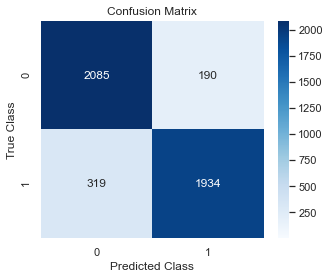

Accuracy: 0.8875883392226148
Precision: 0.9105461393596986
Recall: 0.8584110075454949
False positive rate: 0.08351648351648351
False negative rate: 0.1415889924545051
F1 score: 0.8837103038610921


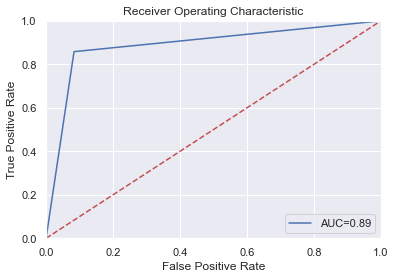

(RandomForestClassifier(max_depth=100, random_state=12),
 0.08351648351648351,
 0.1415889924545051)

In [100]:
randforest(X_train, X_test, y_train, y_test)

In [101]:
# xgboost for feature importance on a classification problem
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from matplotlib import pyplot
# define dataset
#X_fe, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = XGBClassifier(
        n_estimators=500,
        max_depth=9,
        learning_rate=0.05,
        subsample=0.9,
        colsample_bytree=0.9,
        missing=-999,
        random_state=2019,
        tree_method='auto',
        n_jobs = -1,
        
    )
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# # summarize feature importance
# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (i,v))
# # plot feature importance
# pyplot.bar([x for x in range(len(importance))], importance)
# pyplot.show()

/Users/burcakbal/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/burcakbal/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/burcakbal/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using rave

[16:16:36] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [102]:
import pickle as pkl

In [103]:
#model.save_model("model.json")

In [104]:
#model=pkl.load(open('model.pk','rb'))

In [105]:
ypred=model.predict(X_test)

In [106]:

evaluation(ypred,y_test,model)

Accuracy: 0.9154151943462897
Precision: 0.9269406392694064
Recall: 0.9010208610741234
False positive rate: 0.07032967032967033
False negative rate: 0.0989791389258766
F1 score: 0.9137969840198064


(0.07032967032967033, 0.0989791389258766)

In [107]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# ax = sns.heatmap(cf, annot=True, cmap='Blues',fmt="d",)

# # ax.set_title('Seaborn Confusion Matrix with labels\n\n');
# ax.set_xlabel('\nPredicted ')
# ax.set_ylabel('Actual');

## Ticket labels - List must be in alphabetical order
#ax.xaxis.set_ticklabels(['Setosa','Versicolor', 'Virginia'])
#ax.yaxis.set_ticklabels(['Setosa','Versicolor', 'Virginia'])

## Display the visualization of the Confusion Matrix.
# plt.show()

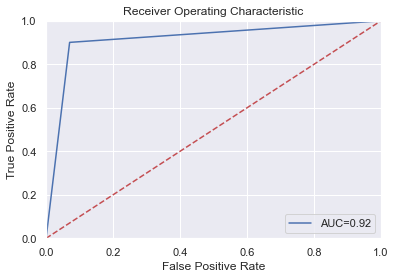

In [108]:
fpr, tpr, threshold = roc_curve(y_test, model.predict(X_test))
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC=%0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
#plt.savefig(f'plots/roc_{model_name}.png')
plt.show()

**Error Curve**

In [109]:
evalset = [(X_train, y_train), (X_test,y_test)]

In [ ]:
model.fit(X_train, y_train, eval_metric='logloss', eval_set=evalset)

In [111]:
# evaluate performance
yhat = model.predict(X_test)
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)

Accuracy: 0.915


In [112]:
# retrieve performance metrics
results = model.evals_result()

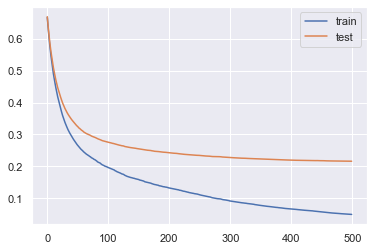

In [113]:
# plot learning curves
pyplot.plot(results['validation_0']['logloss'], label='train')
pyplot.plot(results['validation_1']['logloss'], label='test')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

**Feature Importance**

In [114]:
importance = model.feature_importances_
a=importance
index_list_to_remove = [i for i in range(len(a)) if a[i] < 0.0005]

In [115]:
imp = np.array(importance)
np.max(imp)

0.20309596

In [116]:
index_list_to_remove

[50, 62, 77, 124, 137]

In [117]:
feature_impt_col=[]
for i in index_list_to_remove:
    feature_impt_col.append(X.columns[i])


In [118]:
feature_impt_col

['V120', 'V144', 'V180', 'V282', 'V314']

In [119]:
cat_col_removed=list(set(cat_col).intersection(feature_impt_col))

In [120]:
cat_col_removed

[]

In [121]:
num_col_removed=list(set(feature_impt_col).intersection(num_col))

In [122]:
num_col_removed

['V314', 'V282', 'V180', 'V144', 'V120']

In [123]:
temp=list(set(num_col) - set(num_col_removed))

In [124]:
temp2=list(set(cat_col) - set(cat_col_removed))

In [125]:
# train_pre_feat=pd.read_csv("train_pre_feat.csv")

# train.shape

In [126]:
X.drop(feature_impt_col,axis=1,inplace=True)

In [127]:
len(X.columns)

159

In [128]:
X_res,y_res=feature_eng(temp,temp2,X,y)

**Feature importance_Graph**

In [129]:
b=train.columns.to_list()
b

['TransactionID',
 'id_01',
 'id_02',
 'id_05',
 'id_06',
 'id_09',
 'id_10',
 'id_11',
 'id_12',
 'id_13',
 'id_14',
 'id_15',
 'id_16',
 'id_17',
 'id_19',
 'id_20',
 'id_28',
 'id_29',
 'id_32',
 'id_34',
 'id_35',
 'id_36',
 'id_37',
 'id_38',
 'DeviceType',
 'isFraud',
 'TransactionAmt',
 'ProductCD',
 'card1',
 'card2',
 'card3',
 'card4',
 'card5',
 'card6',
 'addr1',
 'addr2',
 'R_emaildomain',
 'C2',
 'C3',
 'D1',
 'D8',
 'D9',
 'V95',
 'V98',
 'V99',
 'V104',
 'V107',
 'V108',
 'V111',
 'V114',
 'V117',
 'V120',
 'V123',
 'V124',
 'V129',
 'V130',
 'V131',
 'V135',
 'V136',
 'V138',
 'V139',
 'V141',
 'V142',
 'V144',
 'V146',
 'V148',
 'V161',
 'V162',
 'V165',
 'V166',
 'V169',
 'V170',
 'V171',
 'V172',
 'V173',
 'V174',
 'V175',
 'V176',
 'V180',
 'V181',
 'V184',
 'V185',
 'V186',
 'V187',
 'V188',
 'V189',
 'V191',
 'V194',
 'V195',
 'V200',
 'V205',
 'V208',
 'V209',
 'V210',
 'V214',
 'V215',
 'V220',
 'V221',
 'V223',
 'V224',
 'V226',
 'V227',
 'V228',
 'V229',
 'V2

In [ ]:
data = []
for i in range(len(train.columns)):
    data.append(a[i])

In [131]:
df_new = pd.DataFrame(np.array(data).reshape(1,len(b)), columns=b)
df_new

,TransactionID,id_01,id_02,id_05,id_06,id_09,id_10,id_11,id_12,id_13,...,browser_id_31,version_id_31,screen_width,screen_height,TransactionAmt_Log,P_emaildomain_1,P_emaildomain_2,P_emaildomain_3,P_isproton,lastest_browser
0,0.003627,0.005882,0.00247,0.011733,0.004367,0.00622,0.002639,0.003205,0.001849,0.005473,...,0.004538,0.006936,0.003255,0.005708,0.002164,0.203096,0.003653,0.0028,0.005157,0.004201


In [132]:
df_new["weekday"]

0    0.003465
Name: weekday, dtype: float32

In [133]:
sorted_df_new= df_new.transpose().sort_values(by=[0],ascending=False).head(20)
sorted_df_new

,0
P_emaildomain_1,0.203096
V173,0.032683
V111,0.023225
V286,0.020276
V174,0.014046
V261,0.012428
id_05,0.011733
V303,0.011707
V148,0.010449
id_36,0.010098


<AxesSubplot:>

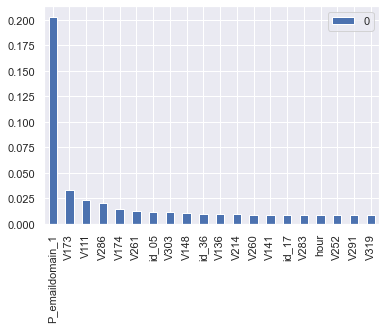

In [134]:
sorted_df_new.plot.bar()

**Random Forest_Default**

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [136]:
# define the model
model_default_rf = RandomForestClassifier(
        
    )
# fit the model
model_default_rf.fit(X_train, y_train)
ypred=model_default_rf.predict(X_test)
evaluation(ypred,y_test,model_default_rf)

<ipython-input-136-1386334e175d>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_default_rf.fit(X_train, y_train)


Accuracy: 0.892226148409894
Precision: 0.9164700330344502
Recall: 0.8619618286728806
False positive rate: 0.0778021978021978
False negative rate: 0.1380381713271194
F1 score: 0.8883806038426351


(0.0778021978021978, 0.1380381713271194)

**Random Forest_H.T. Adjusted**

/Users/burcakbal/Desktop/FraudDetection/FraudDetection/helpers.py:191: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_rf.fit(xtrain, ytrain)


<Figure size 432x288 with 0 Axes>

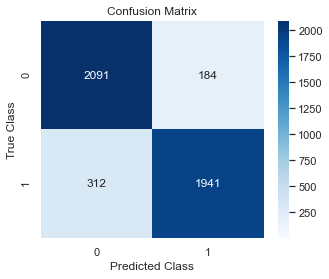

Accuracy: 0.8904593639575972
Precision: 0.9134117647058824
Recall: 0.8615179760319573
False positive rate: 0.08087912087912089
False negative rate: 0.1384820239680426
F1 score: 0.886706258565555


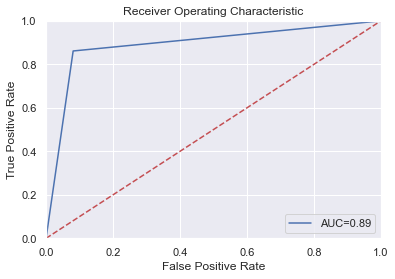

In [137]:
model_random,_,_=randforest(X_train, X_test, y_train, y_test)

**XGBoost_default values**

In [138]:

# define the model
model_default_xgb = XGBClassifier(
        
    )
# fit the model
model_default_xgb.fit(X_train, y_train)
ypred=model_default_xgb.predict(X_test)
evaluation(ypred,y_test,model_default_xgb)

/Users/burcakbal/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/burcakbal/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/burcakbal/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using rave

[16:17:50] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.8933303886925795
Precision: 0.9033728350045579
Recall: 0.8797159343098091
False positive rate: 0.09318681318681318
False negative rate: 0.12028406569019086
F1 score: 0.8913874522149764


(0.09318681318681318, 0.12028406569019086)

**XGBoost_Best_hiperparameters_adjusted**

[16:17:53] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/burcakbal/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/burcakbal/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/burcakbal/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using rave

<Figure size 432x288 with 0 Axes>

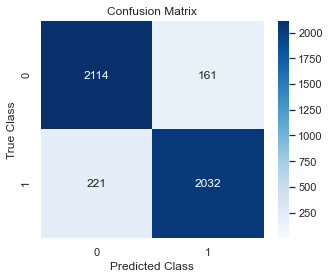

Accuracy: 0.9156360424028268
Precision: 0.9265845873233014
Recall: 0.9019085663559698
False positive rate: 0.07076923076923076
False negative rate: 0.09809143364403018
F1 score: 0.9140800719748088


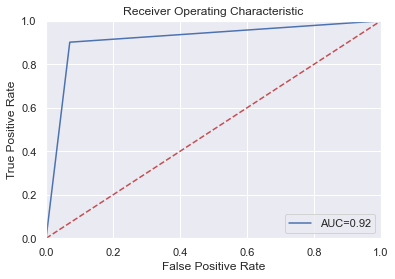

In [139]:
model_xgboost,_,_=xgboost(X_train, X_test, y_train, y_test)

**LGBM_Default Values**

In [140]:
# define the model
model_default_lgbm = lgb.LGBMClassifier(
        
    )
# fit the model
model_default_lgbm.fit(X_train, y_train)
ypred=model_default_lgbm.predict(X_test)
evaluation(ypred,y_test,model_default_lgbm)

/Users/burcakbal/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/burcakbal/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.8860424028268551
Precision: 0.906791569086651
Recall: 0.8592987128273413
False positive rate: 0.08747252747252747
False negative rate: 0.14070128717265867
F1 score: 0.8824065633546034


(0.08747252747252747, 0.14070128717265867)

**LGBM_Adjusted Values**

In [ ]:
model_lgbm,_,_=lightgb(X_train, X_test, y_train, y_test)

Text(0.5, 0, 'False Positive Rate')

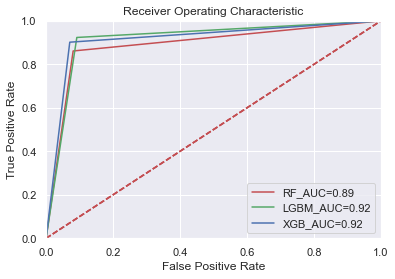

In [142]:
plt.figure(0).clf

fpr, tpr, threshold = roc_curve(y_test, model_random.predict(X_test))
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'r', label='RF_AUC=%0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


fpr, tpr, threshold = roc_curve(y_test, model_lgbm.predict(X_test))
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'g', label='LGBM_AUC=%0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


fpr, tpr, threshold = roc_curve(y_test, model_xgboost.predict(X_test))
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='XGB_AUC=%0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
